# 1D Heisenberg J1J2J3 model (1st set): Inference (10000 samples)

This notebook is part of the work arXiv:2505.22083 (https://arxiv.org/abs/2505.22083), "Hyperbolic recurrent neural network as the first type of non-Euclidean neural quantum state ansatz". Code written by HLD. 

In this notebook, I load the trained models (1D Euclidean GRU & 1D Hyperbolic GRU) in the first set of experiments to generate new samples (spin configurations) whose local energies are calculated. 4 settings are considered: $J_1 = 1.0$ and $(J_2, J_3) = (0.0, 0.5), (0.2,0.2), (0.2, 0.5), (0.5, 0.2)$. The number of spins is $N=30$. The number of samples used for inference is 10000. 

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../../utility')
from j1j2j3_hyprnn_train_loop import *

2025-11-27 21:30:51.454155: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Num GPUs Available:  0


In [2]:
def define_load_test(wf, numsamples, weight_link, Ee):
    test_samples_before = wf.sample(numsamples,2)
    print(f'The number of samples is {len(test_samples_before)}')
    test_gs_before = J1J2J3_local_energies(wf, N, J1, J2, J3, Bz,  numsamples, test_samples_before, True)
    
    gs_mean_b = np.round(np.mean(test_gs_before),4)
    gs_var_b = np.round(np.var(test_gs_before),4)
    print(f'Before loading weights, the ground state energy mean and variance are:')
    print(f'Mean E = {gs_mean_b}, var E = {gs_var_b}')
    print('====================================================================')
    wf.model.load_weights(weight_link)
    test_samples_after = wf.sample(numsamples,2)
    test_gs_after =  J1J2J3_local_energies(wf, N, J1, J2, J3, Bz,  numsamples, test_samples_after, True)
    #print(test_samples_after)
    gs_mean_a = np.round(np.mean(test_gs_after),4)
    gs_var_a = np.round(np.var(test_gs_after),4)
    
    #wf.model.summary()
    #print('====================================================================')
    print(f'After loading weights, the ground state energy mean and variance are:')
    print(f'Mean E = {gs_mean_a}, var E = {gs_var_a}')
    print(f'The exact energy is {np.round(Ee,4)}')

In [3]:
N=30
Bz=+0.0*np.ones(N)
numsamples = 10000

# J2 = 0.0, J3 = 0.5

In [4]:
J1_ = 1.0
J2_ = 0.0
J3_ = 0.5
E_00_05 = -15.890276367

J1=+J1_*np.ones(N) # nearest neighbours couplings
J2=+J2_*np.ones(N) # next-nearest neighbours couplings
J3=+J3_*np.ones(N) # next-next-nearest neighbours couplings

In [6]:
print('EUCLIDEAN GRU')
t1 = time.time()
wf_gru = rnn_eucl_wf(N, 'EuclGRU', 50)
wl_gru='../results_s1/N30_J1=1.0|J2=0.0|J3=0.5_EuclGRU_50_ns=50_MsTrue_checkpoint.weights.h5'
define_load_test(wf_gru, numsamples, wl_gru, E_00_05)
t2 = time.time()
print(f'Time taken for this infererence is t={np.round(t2-t1,3)} secs')

EUCLIDEAN GRU
The number of samples is 10000
Before loading weights, the ground state energy mean and variance are:
Mean E = (10.462499618530273-0.006899999920278788j), var E = 0.9437000155448914
After loading weights, the ground state energy mean and variance are:
Mean E = (-11.339300155639648-0.012400000356137753j), var E = 0.5430999994277954
The exact energy is -15.8903
Time taken for this infererence is t=2010.587 secs


In [7]:
print('HYERBOLIC GRU')
t1 = time.time()
wf_hgru = rnn_hyp_wf(N,'HypGRU', 'hyp', 'id', 50, seed=121)
wl_hgru = '../results_s1/N30_J1=1.0|J2=0.0|J3=0.5_HypGRU_50_id_hyp_ns=50_MsTrue_checkpoint.weights.h5'
define_load_test(wf_hgru, numsamples, wl_hgru, E_00_05)
t2 = time.time()
print(f'Time taken for this infererence is t={np.round(t2-t1,3)} secs')

HYERBOLIC GRU
The number of samples is 10000
Before loading weights, the ground state energy mean and variance are:
Mean E = (9.552300453186035-0.01489999983459711j), var E = 3.0208001136779785
After loading weights, the ground state energy mean and variance are:
Mean E = (-15.063699722290039+0.005499999970197678j), var E = 1.7503000497817993
The exact energy is -15.8903
Time taken for this infererence is t=2206.273 secs


# J2 =0.2, J3=0.2

In [8]:
J1_ = 1.0
J2_ = 0.2
J3_ = 0.2
E_02_02 =-12.94304435468

J1=+J1_*np.ones(N) # nearest neighbours couplings
J2=+J2_*np.ones(N) # next-nearest neighbours couplings
J3=+J3_*np.ones(N) # next-next-nearest neighbours couplings

In [9]:
print('EUCLIDEAN GRU')
t1 = time.time()
wf_gru = rnn_eucl_wf(N, 'EuclGRU', 50)
wl_gru='../results_s1/N30_J1=1.0|J2=0.2|J3=0.2_EuclGRU_50_ns=50_MsTrue_checkpoint.weights.h5'
define_load_test(wf_gru, numsamples, wl_gru, E_02_02)
t2 = time.time()
print(f'Time taken for this infererence is t={np.round(t2-t1,3)} secs')

EUCLIDEAN GRU
The number of samples is 10000
Before loading weights, the ground state energy mean and variance are:
Mean E = (9.883399963378906-0.005200000014156103j), var E = 0.6115999817848206
After loading weights, the ground state energy mean and variance are:
Mean E = (-10.780699729919434+0.027799999341368675j), var E = 2.239799976348877
The exact energy is -12.943
Time taken for this infererence is t=2735.224 secs


In [10]:
print('HYPERBOLIC GRU')
t1 = time.time()
#default seed=111 - better result than seed = 121 in this case 
wf_hgru = rnn_hyp_wf(N,'HypGRU', 'hyp', 'id', 50, seed=121)
wl_hgru = '../results_s1/N30_J1=1.0|J2=0.2|J3=0.2_HypGRU_50_id_hyp_ns=50_MsTrue_checkpoint.weights.h5'
define_load_test(wf_hgru,numsamples, wl_hgru, E_02_02)
t2 = time.time()
print(f'Time taken for this infererence is t={np.round(t2-t1,3)} secs')

HYPERBOLIC GRU
The number of samples is 10000
Before loading weights, the ground state energy mean and variance are:
Mean E = (9.15429973602295-0.012299999594688416j), var E = 2.184299945831299
After loading weights, the ground state energy mean and variance are:
Mean E = (-11.980400085449219-0.01140000019222498j), var E = 2.179800033569336
The exact energy is -12.943
Time taken for this infererence is t=3135.653 secs


# J2 =0.2, J3=0.5

In [11]:
J1_ = 1.0
J2_ = 0.2
J3_ = 0.5
E_02_05 = -14.640825798

J1=+J1_*np.ones(N) # nearest neighbours couplings
J2=+J2_*np.ones(N) # next-nearest neighbours couplings
J3=+J3_*np.ones(N) # next-next-nearest neighbours couplings

In [12]:
print('EUCLIDEAN GRU')
t1 = time.time()
wf_gru = rnn_eucl_wf(N, 'EuclGRU', 50, seed = 121)
wl_gru='../results_s1/N30_J1=1.0|J2=0.2|J3=0.5_EuclGRU_50_ns=50_MsTrue_checkpoint.weights.h5'
define_load_test(wf_gru,numsamples, wl_gru, E_02_05)
t2 = time.time()
print(f'Time taken for this infererence is t={np.round(t2-t1,3)} secs')

EUCLIDEAN GRU
The number of samples is 10000
Before loading weights, the ground state energy mean and variance are:
Mean E = (11.505900382995605+0.00279999990016222j), var E = 1.687399983406067
After loading weights, the ground state energy mean and variance are:
Mean E = (-9.998000144958496-0.02239999920129776j), var E = 5.888999938964844
The exact energy is -14.6408
Time taken for this infererence is t=2802.138 secs


In [13]:
print('HYPERBOLIC GRU')
t1 = time.time()
wf_hgru = rnn_hyp_wf(N,'HypGRU', 'hyp', 'id', 50, seed=121)
wl_hgru = '../results_s1/N30_J1=1.0|J2=0.2|J3=0.5_HypGRU_50_id_hyp_ns=50_MsTrue_checkpoint.weights.h5'
define_load_test(wf_hgru,numsamples, wl_hgru, E_02_05)
t2 = time.time()
print(f'Time taken for this infererence is t={np.round(t2-t1,3)} secs')

HYPERBOLIC GRU
The number of samples is 10000
Before loading weights, the ground state energy mean and variance are:
Mean E = (10.788900375366211-0.01510000042617321j), var E = 3.898200035095215
After loading weights, the ground state energy mean and variance are:
Mean E = (-12.744799613952637-0.002899999963119626j), var E = 3.3861000537872314
The exact energy is -14.6408
Time taken for this infererence is t=3156.585 secs


# J2 =0.5, J3=0.2

In [14]:
J1_ = 1.0
J2_ = 0.5
J3_ = 0.2
E_05_02 =-11.528738924

J1=+J1_*np.ones(N) # nearest neighbours couplings
J2=+J2_*np.ones(N) # next-nearest neighbours couplings
J3=+J3_*np.ones(N) # next-next-nearest neighbours couplings

In [15]:
print('EUCLIDEAN GRU')
t1 = time.time()
wf_gru = rnn_eucl_wf(N, 'EuclGRU', 50)
wl_gru='../results_s1/N30_J1=1.0|J2=0.5|J3=0.2_EuclGRU_50_ns=50_MsTrue_checkpoint.weights.h5'
define_load_test(wf_gru, numsamples, wl_gru, E_05_02)
t2 = time.time()
print(f'Time taken for this infererence is t={np.round(t2-t1,3)} secs')

EUCLIDEAN GRU
The number of samples is 10000
Before loading weights, the ground state energy mean and variance are:
Mean E = (11.949299812316895-0.006200000178068876j), var E = 0.974399983882904
After loading weights, the ground state energy mean and variance are:
Mean E = (-9.656200408935547-0.007400000002235174j), var E = 1.9595999717712402
The exact energy is -11.5287
Time taken for this infererence is t=2633.648 secs


In [16]:
print('HYPERBOLIC GRU')
t1 = time.time()
wf_hgru = rnn_hyp_wf(N,'HypGRU', 'hyp', 'id', 50, seed=111)
wl_hgru = '../results_s1/N30_J1=1.0|J2=0.5|J3=0.2_HypGRU_50_id_hyp_ns=50_MsTrue_checkpoint.weights.h5'
define_load_test(wf_hgru,numsamples, wl_hgru,E_05_02)
t2 = time.time()
print(f'Time taken for this infererence is t={np.round(t2-t1,3)} secs')

HYPERBOLIC GRU
The number of samples is 10000
Before loading weights, the ground state energy mean and variance are:
Mean E = (7.768799781799316-0.002099999925121665j), var E = 9.699899673461914
After loading weights, the ground state energy mean and variance are:
Mean E = (-10.797300338745117+0.003599999938160181j), var E = 0.3061000108718872
The exact energy is -11.5287
Time taken for this infererence is t=2964.062 secs


# Convergence curves

In [2]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
color_l = ['cyan', 'green', 'orange', 'cyan', 'purple']
def plot_res_meanE(ax, Ee, e_list, e_names, j23, frange, legend_loc):
    for i in range(len(e_list)):
        ax.plot(np.arange(len(e_list[i])), np.real(e_list[i]),color = color_l[i], label = e_names[i])
    ax.axhline(Ee, color = 'red', linestyle = 'dashed', label = 'DMRG')
    ax.set_xlabel("Epoch", fontsize = 14)
    ax.set_ylabel("Mean Energy", fontsize = 14)
    ax.set_title(f"(J2,J3)={(j23[0], j23[1])}",fontsize = 15)
    ax.legend(loc='best')
    
color_l = ['cyan', 'green', 'orange', 'cyan', 'purple']
def plot_res_var(ax, v_list, e_names, j23, frange, legend_loc):
    for i in range(len(v_list)):
        ax.plot(np.arange(len(v_list[i])), v_list[i],color = color_l[i], label = e_names[i])
    ax.axhline(0.0, color = 'red', linestyle = 'dashed')
    ax.set_xlabel("Epoch", fontsize = 14)
    ax.set_ylim(-5, 45)
    ax.set_ylabel("Energy variance", fontsize = 14)
    ax.set_title(f"(J2,J3)={(j23[0], j23[1])}",
              fontsize = 15)
    ax.legend(loc='best')

In [4]:
fname = '../results_s1'
###################################### (J2, J3) = (0.0, 0.5) #######################################
mE00_05 = np.load(f'{fname}/N30_J1=1.0|J2=0.0|J3=0.5_EuclGRU_50_ns50_MsTrue_meanE.npy')
vE00_05 = np.load(f'{fname}/N30_J1=1.0|J2=0.0|J3=0.5_EuclGRU_50_ns=50_MsTrue_varE.npy')

mEh00_05 =np.load(f'{fname}/N30_J1=1.0|J2=0.0|J3=0.5_HypGRU_50_id_hyp_ns50_MsTrue_meanE.npy')
vEh00_05 =np.load(f'{fname}/N30_J1=1.0|J2=0.0|J3=0.5_HypGRU_50_id_hyp_ns=50_MsTrue_varE.npy')

###################################### (J2, J3) = (0.2, 0.2) #######################################
mE02_02 = np.load(f'{fname}/N30_J1=1.0|J2=0.2|J3=0.2_EuclGRU_50_ns50_MsTrue_meanE.npy')
vE02_02 = np.load(f'{fname}/N30_J1=1.0|J2=0.2|J3=0.2_EuclGRU_50_ns=50_MsTrue_varE.npy')

mEh02_02 =np.load(f'{fname}/N30_J1=1.0|J2=0.2|J3=0.2_HypGRU_50_id_hyp_ns50_MsTrue_meanE.npy')
vEh02_02 =np.load(f'{fname}/N30_J1=1.0|J2=0.2|J3=0.2_HypGRU_50_id_hyp_ns=50_MsTrue_varE.npy')

###################################### (J2, J3) = (0.2, 0.5) #######################################
mE02_05 = np.load(f'{fname}/N30_J1=1.0|J2=0.2|J3=0.5_EuclGRU_50_ns50_MsTrue_meanE.npy')
vE02_05 = np.load(f'{fname}/N30_J1=1.0|J2=0.2|J3=0.5_EuclGRU_50_ns=50_MsTrue_varE.npy')

mEh02_05 =np.load(f'{fname}/N30_J1=1.0|J2=0.2|J3=0.5_HypGRU_50_id_hyp_ns50_MsTrue_meanE.npy')
vEh02_05 =np.load(f'{fname}/N30_J1=1.0|J2=0.2|J3=0.5_HypGRU_50_id_hyp_ns=50_MsTrue_varE.npy')

###################################### (J2, J3) = (0.5, 0.2) #######################################
mE05_02 = np.load(f'{fname}/N30_J1=1.0|J2=0.5|J3=0.2_EuclGRU_50_ns50_MsTrue_meanE.npy')
vE05_02 = np.load(f'{fname}/N30_J1=1.0|J2=0.5|J3=0.2_EuclGRU_50_ns=50_MsTrue_varE.npy')

mEh05_02 =np.load(f'{fname}/N30_J1=1.0|J2=0.5|J3=0.2_HypGRU_50_id_hyp_ns50_MsTrue_meanE.npy')
vEh05_02 =np.load(f'{fname}/N30_J1=1.0|J2=0.5|J3=0.2_HypGRU_50_id_hyp_ns=50_MsTrue_varE.npy')

In [5]:
E_00_05 = -15.890276367
E_02_02 = -12.943044355
E_02_05 = -14.640825798
E_05_02 = -11.528738924

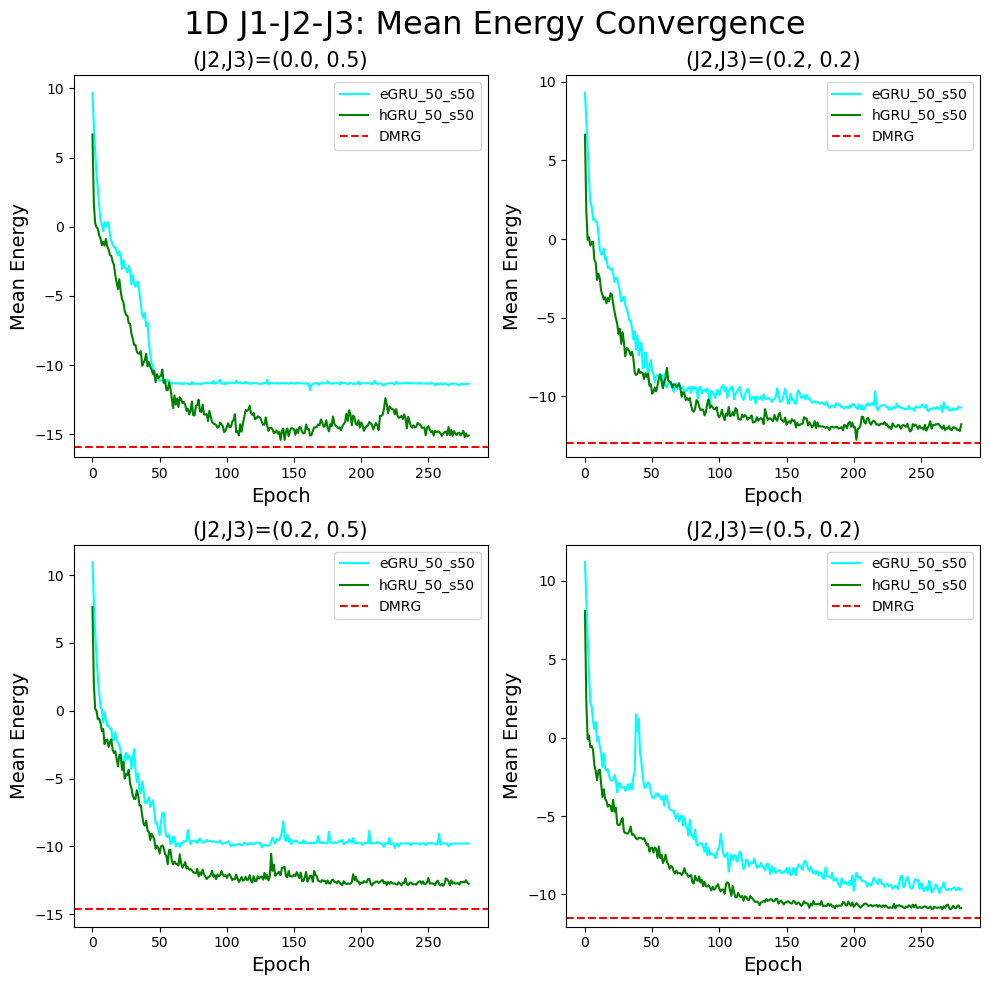

In [6]:
fig, ax = plt.subplots(2,2, figsize=(10, 10), tight_layout=True)
e_names = ['eGRU_50_s50',  'hGRU_50_s50']
e_list00_05 = [mE00_05, mEh00_05]
e_list02_02 = [mE02_02,  mEh02_02]
e_list02_05 = [mE02_05, mEh02_05]
e_list05_02 = [mE05_02, mEh05_02]

plot_res_meanE(ax[0,0], E_00_05, e_list00_05, e_names, [0.0, 0.5], [100,290, E_00_05-0.5, E_00_05+3.5], (0.15, 0.38, 0.8, 0.2))
plot_res_meanE(ax[0,1], E_02_02, e_list02_02, e_names, [0.2,0.2], [100,290, E_02_02-0.2, E_02_02+3.], (0.15, 0.38, 0.8, 0.2))
plot_res_meanE(ax[1,0], E_02_05, e_list02_05, e_names, [0.2,0.5], [100,290, E_02_05-0.5, E_02_05+4.5], (0.15, 0.3, 0.8, 0.2))
plot_res_meanE(ax[1,1], E_05_02, e_list05_02, e_names, [0.5, 0.2], [100,290,E_05_02-0.5, E_05_02+4.5], (0.15, 0.3, 0.8, 0.2))

plt.suptitle('1D J1-J2-J3: Mean Energy Convergence', fontsize = 23)
plt.savefig('1D-J1-J2-J3-N=30.png')

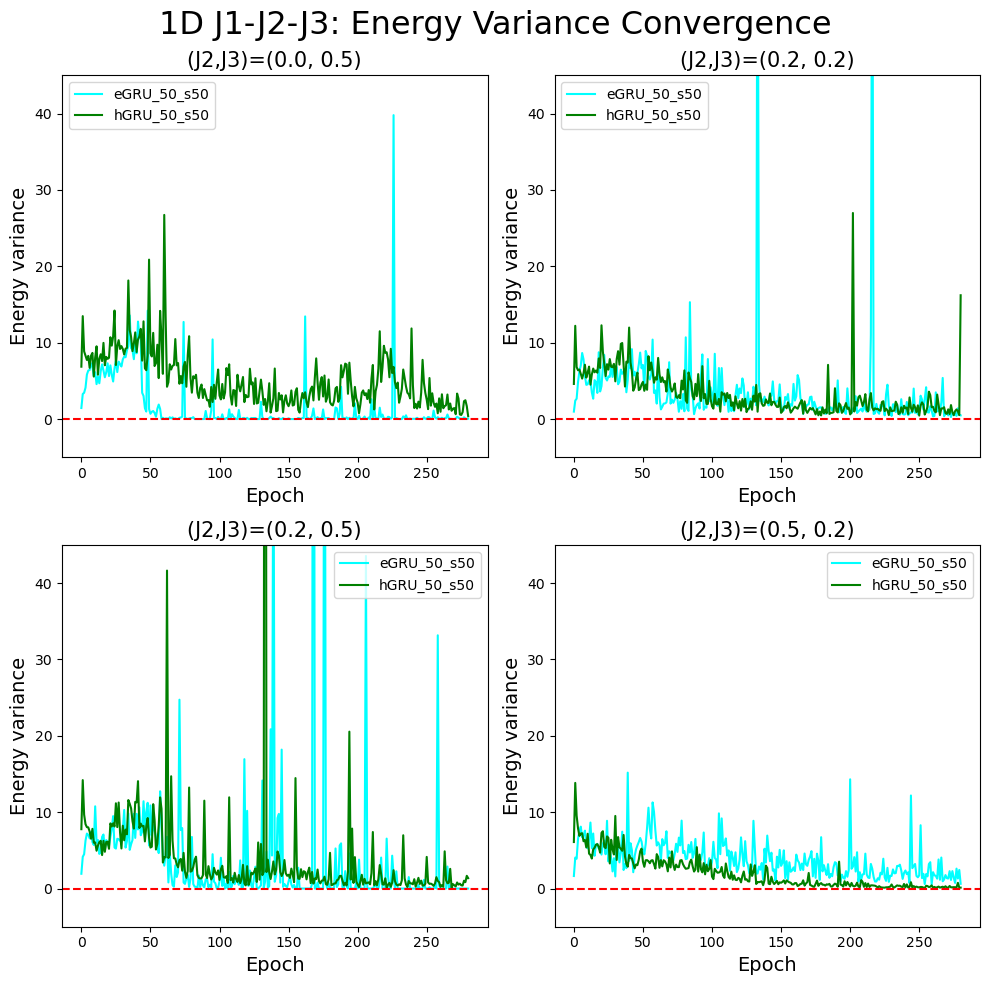

In [7]:
fig, ax = plt.subplots(2,2, figsize=(10, 10), tight_layout=True)

e_names = ['eGRU_50_s50',  'hGRU_50_s50']
e_list00_05 = [vE00_05, vEh00_05]
e_list02_02 = [vE02_02, vEh02_02]
e_list02_05 = [vE02_05, vEh02_05]
e_list05_02 = [vE05_02, vEh05_02]

plot_res_var(ax[0,0], e_list00_05, e_names, [0.0, 0.5], [100,290, -0.5, 3.5], (0.15, 0.75, 0.3, 0.2))
plot_res_var(ax[0,1], e_list02_02, e_names, [0.2,0.2], [100,290, -0.2, 3.], (0.15, 0.75, 0.3, 0.2))
plot_res_var(ax[1,0],  e_list02_05, e_names, [0.2,0.5], [100,290, -0.5, 4.5], (0.15, 0.75, 0.3, 0.2))
plot_res_var(ax[1,1], e_list05_02, e_names, [0.5, 0.2], [100,290,-0.5, 2.5], (0.15, 0.75, 0.3, 0.2))

plt.suptitle('1D J1-J2-J3: Energy Variance Convergence', fontsize = 23)
plt.savefig('1D-J1-J2-J3-N=30-var.png')